In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os, sys
import pandas as pd
import sklearn
import sklearn.svm, sklearn.discriminant_analysis
import time
import PIL.Image 

root = '/usr/local/serenceslab/maggie/shapeDim/'

sys.path.append(os.path.join(root, 'Analysis'))
from code_utils import file_utils, data_utils, plot_utils, grid_utils

In [2]:
main_grid_points = grid_utils.get_main_grid()
all_grid_points, \
[dist_groups_binned1, dist_groups_binned2, dist_groups_binned3] = \
        grid_utils.get_full_grid_maintask()


#### Load the images viewed in the main grid

In [3]:
imdir = 'AmpGrid3_adj_full_grey_small'
# imdir = 'AmpGrid3_adj_full_grey'
print(imdir)

# params for low-contrast version of experiment (all subjects except S01)
backColorOrig = 77;
shapeColorOrig = 230;

backColor = 50;
fixColor = [0.05, 0.05, 0.05  ] * 255;
shapeColor = 0.12 * 255;    
print(np.round(backColor), np.round(shapeColor))

image_dir = os.path.join(root, 'Stimuli',imdir)

ims = []

for ii in range(main_grid_points.shape[0]):
    
    imfn = os.path.join(image_dir, 'Shape_%.2f_%.2f.png'%(main_grid_points[ii,0], main_grid_points[ii,1]) )
    
    im = PIL.Image.open(imfn)
    
    orig_vals = np.unique(im.getdata())
    # imdat = np.reshape(np.array(im.getdata()), im.size)
    
    # raw images are actually the wrong color, we switched the colors
    # before showing to subjects.
    # imdat[imdat==shapeColorOrig] = shapeColor
    # imdat[imdat==backColorOrig] = backColor
     
    # im = PIL.Image.fromarray(imdat.astype(np.int32))
    
    # im = im.resize([100,100])
    imdat = np.reshape(np.array(im.getdata()), im.size)
    
    # imdat = 
    
    ims += [imdat]
    
    

AmpGrid3_adj_full_grey_small
50 31.0


#### Plot the shapes

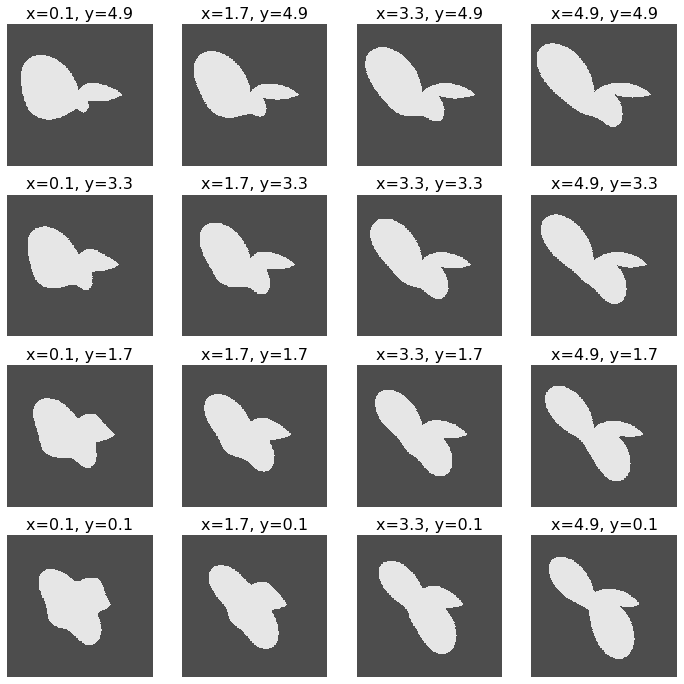

In [6]:
plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)

plt.figure(figsize=(12,12))
plot_order = np.flipud(np.reshape(np.arange(16)+1,[4,4]))
plot_order = plot_order.ravel()

for ii in range(main_grid_points.shape[0]):
    
    plt.subplot(4,4,plot_order[ii])
        
    plt.pcolormesh(ims[ii], vmin=0, vmax=255, cmap='gray')
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('x=%.1f, y=%.1f'%(main_grid_points[ii,0], main_grid_points[ii,1]))
    
# figfolder = os.path.join(root, 'Analysis','figures')
# figname = os.path.join(figfolder, 'shapes_grid.png')
# plt.savefig(figname)

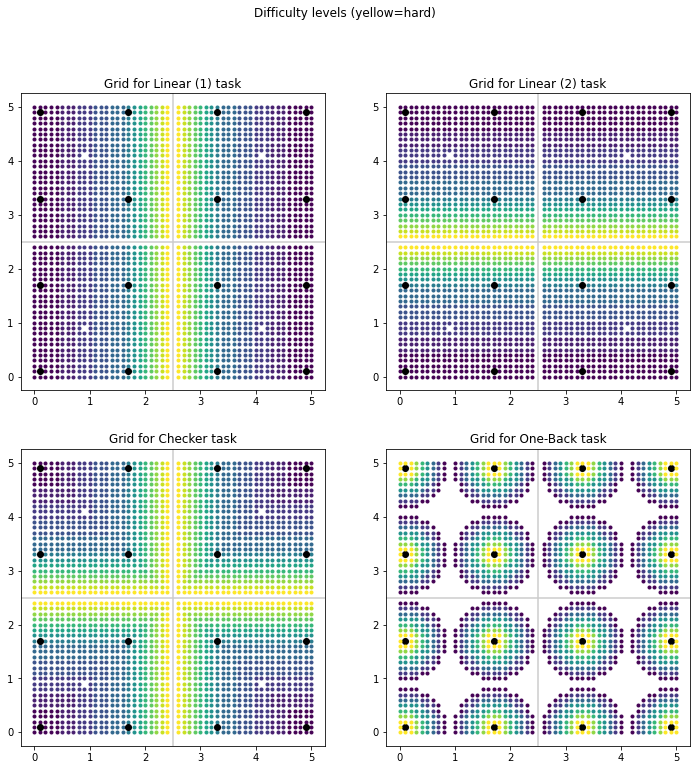

In [5]:
task_names = ['Linear (1)','Linear (2)','Checker', 'One-Back'];
n_tasks = len(task_names)

n_bins = len(np.unique(dist_groups_binned1))
colors = cm.viridis(np.linspace(0,1,n_bins))

plt.figure(figsize=(12,12))

for ti, dist_groups in enumerate([dist_groups_binned1, dist_groups_binned2, dist_groups_binned3]):
    
    plt.subplot(2,2,ti+1)
    
    for di, dd in enumerate(np.unique(dist_groups)):
        
        inds = dist_groups==dd
        
        plt.plot(all_grid_points[inds,0], all_grid_points[inds,1], '.', color=colors[di,:])
        
    plt.xticks(np.arange(0, 5.1,1))
    plt.yticks(np.arange(0, 5.1,1))
    plt.axvline(2.5, color=[0.8, 0.8, 0.8])
    plt.axhline(2.5, color=[0.8, 0.8, 0.8])
    plt.title('Grid for %s task'%(task_names[ti]))
    plt.plot(main_grid_points[:,0], main_grid_points[:,1],'o',color='k')

    
ti = 3;
plt.subplot(2,2,ti+1)
plt.plot(main_grid_points[:,0], main_grid_points[:,1],'o',color='k')

repeat_diff_colors = cm.viridis(np.linspace(0,1,7))

n_variable_grid = 16;
n_diff_levels = 7;
for pp in range(n_variable_grid):
    pt = main_grid_points[pp,:]
    for dd in range(n_diff_levels):
        neighbors = grid_utils.get_neighbors_repeattask(pt, dd)
        
        plt.plot(neighbors[:,0], neighbors[:,1], '.', color=repeat_diff_colors[dd,:])
plt.xticks(np.arange(0, 5.1,1))
plt.yticks(np.arange(0, 5.1,1))
plt.axvline(2.5, color=[0.8, 0.8, 0.8])
plt.axhline(2.5, color=[0.8, 0.8, 0.8])
plt.title('Grid for %s task'%(task_names[ti]))
        
plt.suptitle('Difficulty levels (yellow=hard)');



#### Plotting the actual grid of shape space coords each subject saw

In [ ]:
subjects = np.arange(1,8)
n_subj = len(subjects)

task_names = ['Linear (1)','Linear (2)','Checker', 'One-Back'];
n_tasks = len(task_names)

si = 1; ss = 2;

# for si, ss in enumerate(subjects):

bdat = pd.read_csv(os.path.join(root, 'DataBehavior','S%02d'%ss, 'S%02d_maintask_preproc_all.csv'%ss), \
                   index_col = 0)

actual_grids = []
for ti in range(n_tasks-1):

    inds = bdat['task']==(ti+1)

    actual_grids += [np.array([bdat['ptx'][inds], bdat['pty'][inds]]).T]

bdat = pd.read_csv(os.path.join(root, 'DataBehavior','S%02d'%ss, 'S%02d_reptask_preproc_all.csv'%ss), \
                   index_col = 0)

actual_grids += [np.array([bdat['ptx'], bdat['pty']]).T]

plt.figure(figsize=(10,10))
for ti in range(n_tasks):

    plt.subplot(2,2,ti+1)

    unique_pts = np.unique(actual_grids[ti], axis=0)
    plt.plot(unique_pts[:,0], unique_pts[:,1], '.', color=[0.8, 0.8, 0.8])

    plt.plot(main_grid_points[:,0], main_grid_points[:,1], 'o', color='k')

    plt.axis('square')
    
    plt.xticks(np.arange(0, 5.1,1))
    plt.yticks(np.arange(0, 5.1,1))
    if (ti==0) or (ti==2):
        plt.axvline(2.5, color=[0.4, 0.4, 0.4],ls='--')
    if (ti==1) or (ti==2):
        plt.axhline(2.5, color=[0.4, 0.4, 0.4],ls='--')
    plt.xlabel('axis 1 coordinate (a.u.)')
    plt.ylabel('axis 2 coordinate (a.u.)')
    
    plt.title('%s task'%(task_names[ti]))

plt.suptitle('S%02d'%ss)

figfolder = os.path.join(root, 'Analysis','figures')
figname = os.path.join(figfolder, 'grid_pts_S%02d.pdf'%ss)
plt.savefig(figname)

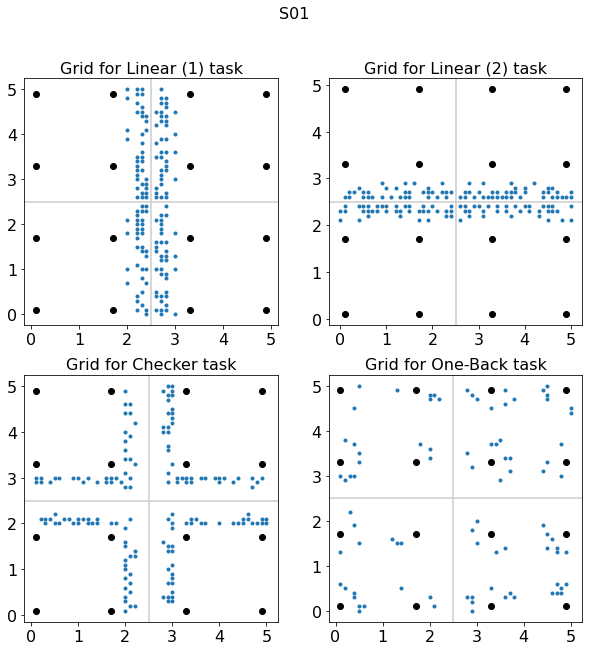

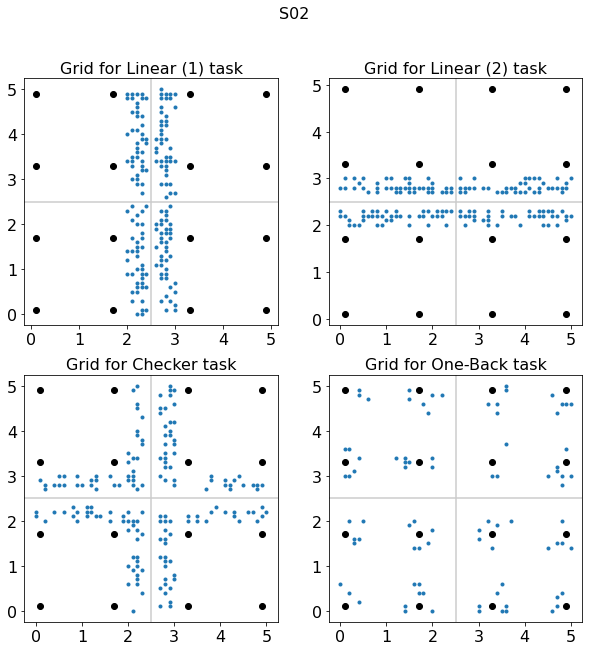

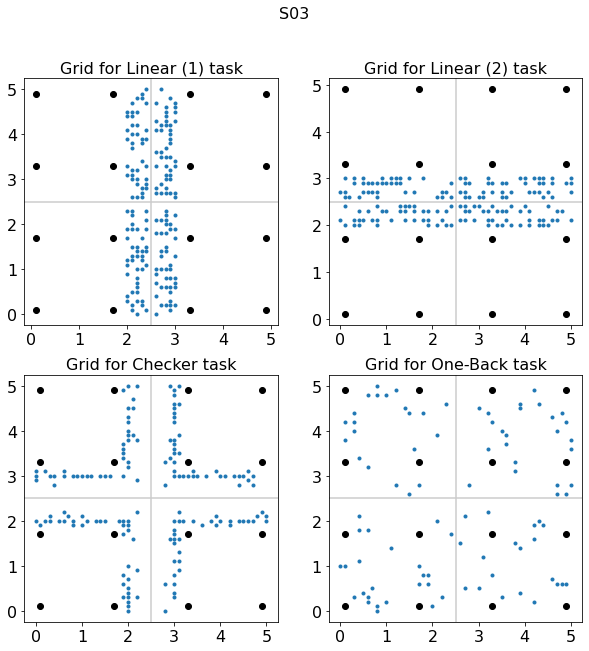

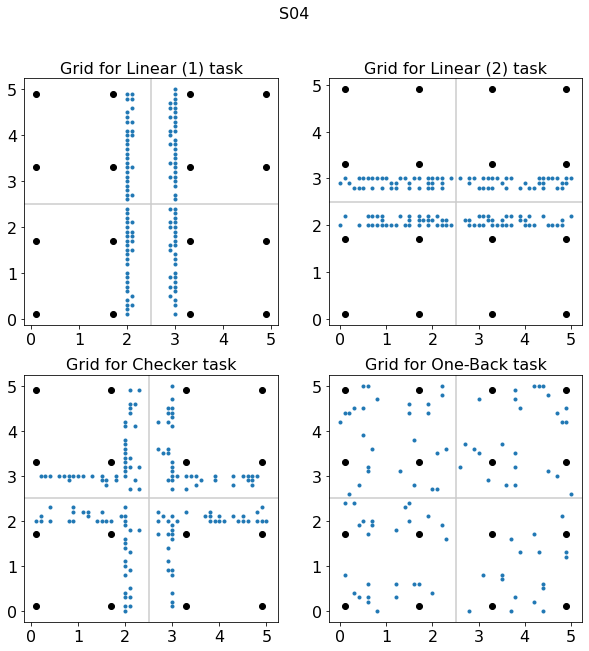

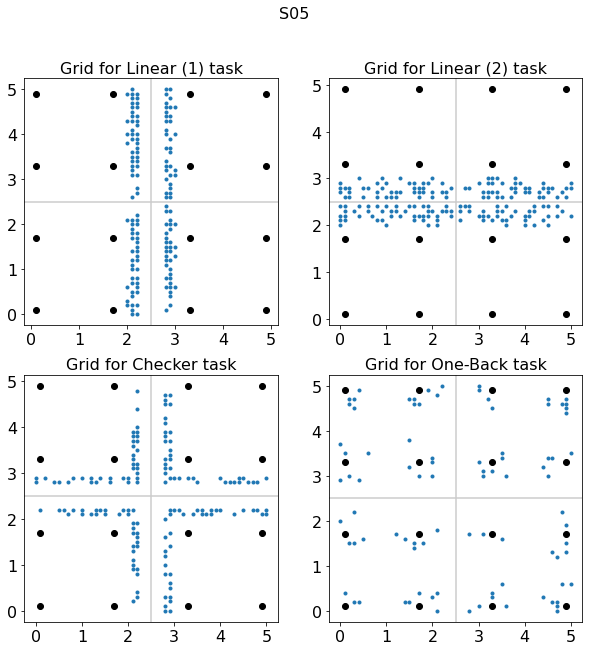

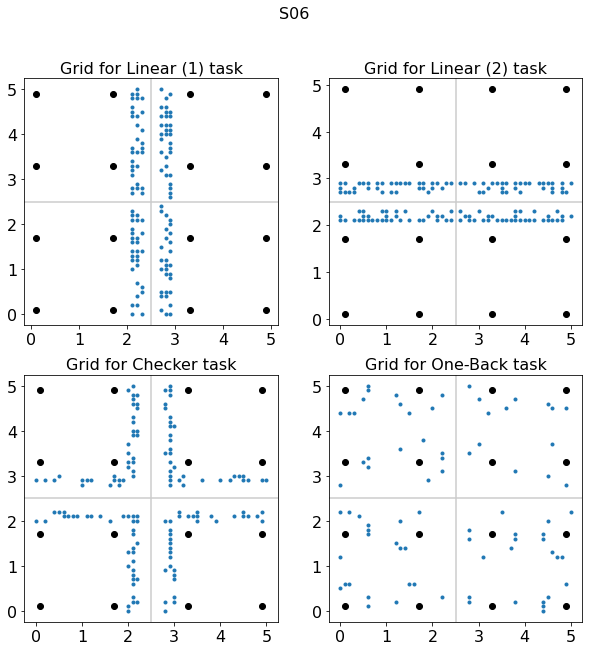

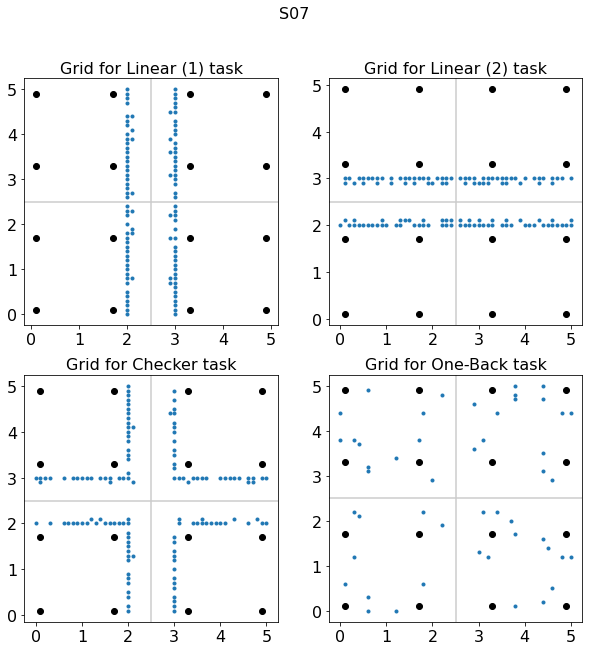

In [15]:
subjects = np.arange(1,8)
n_subj = len(subjects)

task_names = ['Linear (1)','Linear (2)','Checker', 'One-Back'];
n_tasks = len(task_names)

# si = 0; ss = 1;

for si, ss in enumerate(subjects):

    bdat = pd.read_csv(os.path.join(root, 'DataBehavior','S%02d'%ss, 'S%02d_maintask_preproc_all.csv'%ss), \
                       index_col = 0)

    actual_grids = []
    for ti in range(n_tasks-1):

        inds = bdat['task']==(ti+1)

        actual_grids += [np.array([bdat['ptx'][inds], bdat['pty'][inds]]).T]

    bdat = pd.read_csv(os.path.join(root, 'DataBehavior','S%02d'%ss, 'S%02d_reptask_preproc_all.csv'%ss), \
                       index_col = 0)

    actual_grids += [np.array([bdat['ptx'], bdat['pty']]).T]


    plt.figure(figsize=(10,10))
    for ti in range(n_tasks):

        plt.subplot(2,2,ti+1)

        unique_pts = np.unique(actual_grids[ti], axis=0)
        plt.plot(unique_pts[:,0], unique_pts[:,1], '.')

        plt.plot(main_grid_points[:,0], main_grid_points[:,1], 'o', color='k')

        plt.xticks(np.arange(0, 5.1,1))
        plt.yticks(np.arange(0, 5.1,1))
        plt.axvline(2.5, color=[0.8, 0.8, 0.8])
        plt.axhline(2.5, color=[0.8, 0.8, 0.8])
        plt.title('Grid for %s task'%(task_names[ti]))

    plt.suptitle('S%02d'%ss)

# figfolder = os.path.join(root, 'Analysis','figures')
# figname = os.path.join(figfolder, 'grid_pts.pdf')
# plt.savefig(figname)

#### creating a bigger version of the image grid, for use in figure

In [7]:
# imdir = 'AmpGrid3_adj_full_grey_small'
imdir = 'AmpGrid3_adj_full_grey'
print(imdir)

# params for low-contrast version of experiment (all subjects except S01)
backColorOrig = 77;
shapeColorOrig = 230;

backColor = 50;
fixColor = [0.05, 0.05, 0.05  ] * 255;
shapeColor = 0.12 * 255;    
print(np.round(backColor), np.round(shapeColor))

image_dir = os.path.join(root, 'Stimuli',imdir)

ims = []

for ii in range(main_grid_points.shape[0]):
    
    imfn = os.path.join(image_dir, 'Shape_%.2f_%.2f.png'%(main_grid_points[ii,0], main_grid_points[ii,1]) )
    
    im = PIL.Image.open(imfn)
    
    orig_vals = np.unique(im.getdata())
    # imdat = np.reshape(np.array(im.getdata()), im.size)
    
    # raw images are actually the wrong color, we switched the colors
    # before showing to subjects.
    # imdat[imdat==shapeColorOrig] = shapeColor
    # imdat[imdat==backColorOrig] = backColor
     
    # im = PIL.Image.fromarray(imdat.astype(np.int32))
    
    # im = im.resize([100,100])
    imdat = np.reshape(np.array(im.getdata()), im.size)
    
    # imdat = 
    
    ims += [imdat]
    
    

AmpGrid3_adj_full_grey
50 31.0


In [8]:
imdat.shape

(3000, 3000)

In [9]:
order2 = np.flipud(np.repeat(np.arange(4),4))
order1 = np.tile(np.arange(4),[4,])
order1, order2

(array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]),
 array([3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0]))

In [10]:
shapes_concat = np.concatenate([np.concatenate([ims[np.where((order1==ii) & (order2==jj))[0][0]] \
                  for ii in range(4)], axis=1) \
                  for jj in range(4)], axis=0)
shapes_concat.shape

(12000, 12000)

In [11]:
big_im = PIL.Image.fromarray(shapes_concat.astype(np.int32)).convert('RGB')
big_im.size

(12000, 12000)

In [12]:
big_im

In [13]:
figname = os.path.join(figfolder, 'shapes_grid.png')
big_im.save(figname)